In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import seaborn as sns
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.compat import lzip
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import statsmodels.api as sms
import statsmodels.stats.api as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
from sklearn.model_selection import cross_val_score

# reading the data
bikes_hour_df_raws = pd.read_csv('.\\Documents\\hour.csv')




In [4]:
pd.DataFrame(pd.get_dummies(bikes_hour_df_raws))

bikes_hour_df_raws['dteday'] = pd.to_datetime(bikes_hour_df_raws['dteday'])
bikes_hour_df_raws['dteday']=bikes_hour_df_raws['dteday'].map(dt.datetime.toordinal)

bikes_hour_df = bikes_hour_df_raws.drop(['casual' , 'registered'], axis=1)




In [5]:
# sns.pairplot(bikes_hour_df)
# plt.show()

# bikes_hour_df['cnt'].describe()
#
# bikes_hour_df['cnt'] = np.log(bikes_hour_df['cnt'])
# bikes_hour_df['cnt'].plot(kind='hist', title= 'Log of Bike count rented')
# plt.show()


bikes_df_model_data = bikes_hour_df.copy()
print(bikes_df_model_data)
outcome = 'cnt'
Model_1_X = bikes_df_model_data.drop(['cnt'], axis = 1)
Model_2_dummy= pd.get_dummies(bikes_df_model_data['weathersit'])
Model_2_X= pd.concat([bikes_df_model_data,Model_2_dummy], axis=1)
Model_2_X = Model_2_X.drop(['cnt', 'instant', 'dteday', 'mnth', 'workingday', 'weathersit', 'holiday','temp'], axis = 1)
Model_3_X = bikes_df_model_data.drop(['cnt', 'instant', 'dteday', 'mnth', 'workingday','weathersit', 'holiday','atemp', 'yr', 'hr',], axis = 1)




       instant  dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1  734138       1   0     1   0        0        6           0   
1            2  734138       1   0     1   1        0        6           0   
2            3  734138       1   0     1   2        0        6           0   
3            4  734138       1   0     1   3        0        6           0   
4            5  734138       1   0     1   4        0        6           0   
5            6  734138       1   0     1   5        0        6           0   
6            7  734138       1   0     1   6        0        6           0   
7            8  734138       1   0     1   7        0        6           0   
8            9  734138       1   0     1   8        0        6           0   
9           10  734138       1   0     1   9        0        6           0   
10          11  734138       1   0     1  10        0        6           0   
11          12  734138       1   0     1  11        0        6  

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 01 Feb 2019   Prob (F-statistic):                nan
Time:                        13:55:26   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17365   BIC:                         2.217e+05
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
instant       -0.0050      0.005     -0.979      0.3

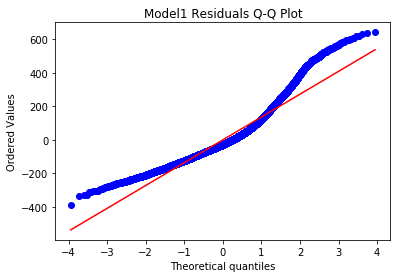

[('Lagrange multiplier statistic', 1579.5263545768646), ('p-value', 0.0), ('f-value', 133.5413287166098), ('f p-value', 0.0)]
Model 1: None
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 01 Feb 2019   Prob (F-statistic):                nan
Time:                        13:55:29   Log-Likelihood:            -1.1074e+05
No. Observations:               17379   AIC:                         2.215e+05
Df Residuals:                   17368   BIC:                         2.216e+05
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025    

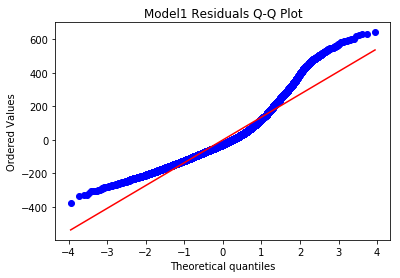

[('Lagrange multiplier statistic', 1449.1894723564203), ('p-value', 2.3717814729962993e-305), ('f-value', 158.00264988845117), ('f p-value', 4.82495e-319)]
Model 2: None
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     4936.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:55:32   Log-Likelihood:            -1.1262e+05
No. Observations:               17379   AIC:                         2.252e+05
Df Residuals:                   17374   BIC:                         2.253e+05
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err        

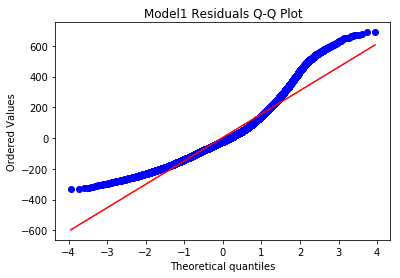

[('Lagrange multiplier statistic', 4188.217620556516), ('p-value', 0.0), ('f-value', 1103.2869900567475), ('f p-value', 0.0)]
Model 3: None


In [6]:
# Fit the linear model:

def linearmodel(x):
    model = linear_model.LinearRegression()
    model.fit(x, bikes_df_model_data[outcome])
    model = sms.OLS(bikes_df_model_data[outcome], x).fit(cov_type='HC3')
    model.predict(x)
    print_model = model.summary()
    print(print_model)
    # Check for Multicolinearity
    print(x.corr())
    # Check for Normality of the Residuals
    stats.probplot(model.resid, dist="norm", plot=plt)
    plt.title("Model1 Residuals Q-Q Plot")
    plt.show()
    # Check for Homoscadisticity
    name = ['Lagrange multiplier statistic', 'p-value',
            'f-value', 'f p-value']
    test = sns.het_breuschpagan(model.resid, model.model.exog)
    print(lzip(name, test))



print('Model 1:', linearmodel(Model_1_X))
print('Model 2:',linearmodel(Model_2_X))
print('Model 3:',linearmodel(Model_3_X))




In [13]:
#Cross-validation:

def cross_validation(x):
    clf = linear_model.Lasso()
    scores = cross_val_score(clf, x, bikes_df_model_data[outcome], scoring="neg_mean_squared_error", cv=10)
    return scores


print('Cross-validation Model 1:', cross_validation(Model_1_X))
print('Cross-validation Model 2:', cross_validation(Model_2_X))
print('Cross-validation Model 3:', cross_validation(Model_3_X))


def display_scores(score):
        print("Scores:", score)
        print("Mean:", score.mean())
        print("Standard deviation:", score.std())


print('Display Scores: Model 1', display_scores(cross_validation(Model_1_X)))
print('Display Scores: Model 2', display_scores(cross_validation(Model_2_X)))
print('Display Scores: Model 3', display_scores(cross_validation(Model_3_X)))





Cross-validation Model :        instant  dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1  734138       1   0     1   0        0        6           0   
1            2  734138       1   0     1   1        0        6           0   
2            3  734138       1   0     1   2        0        6           0   
3            4  734138       1   0     1   3        0        6           0   
4            5  734138       1   0     1   4        0        6           0   
5            6  734138       1   0     1   5        0        6           0   
6            7  734138       1   0     1   6        0        6           0   
7            8  734138       1   0     1   7        0        6           0   
8            9  734138       1   0     1   8        0        6           0   
9           10  734138       1   0     1   9        0        6           0   
10          11  734138       1   0     1  10        0        6           0   
11          12  734138       1   0     

Cross-validation Model :        season  weekday  temp   hum  windspeed
0           1        6  0.24  0.81     0.0000
1           1        6  0.22  0.80     0.0000
2           1        6  0.22  0.80     0.0000
3           1        6  0.24  0.75     0.0000
4           1        6  0.24  0.75     0.0000
5           1        6  0.24  0.75     0.0896
6           1        6  0.22  0.80     0.0000
7           1        6  0.20  0.86     0.0000
8           1        6  0.24  0.75     0.0000
9           1        6  0.32  0.76     0.0000
10          1        6  0.38  0.76     0.2537
11          1        6  0.36  0.81     0.2836
12          1        6  0.42  0.77     0.2836
13          1        6  0.46  0.72     0.2985
14          1        6  0.46  0.72     0.2836
15          1        6  0.44  0.77     0.2985
16          1        6  0.42  0.82     0.2985
17          1        6  0.44  0.82     0.2836
18          1        6  0.42  0.88     0.2537
19          1        6  0.42  0.88     0.2537
20       

Cross-validation Model :        season  weekday  temp   hum  windspeed
0           1        6  0.24  0.81     0.0000
1           1        6  0.22  0.80     0.0000
2           1        6  0.22  0.80     0.0000
3           1        6  0.24  0.75     0.0000
4           1        6  0.24  0.75     0.0000
5           1        6  0.24  0.75     0.0896
6           1        6  0.22  0.80     0.0000
7           1        6  0.20  0.86     0.0000
8           1        6  0.24  0.75     0.0000
9           1        6  0.32  0.76     0.0000
10          1        6  0.38  0.76     0.2537
11          1        6  0.36  0.81     0.2836
12          1        6  0.42  0.77     0.2836
13          1        6  0.46  0.72     0.2985
14          1        6  0.46  0.72     0.2836
15          1        6  0.44  0.77     0.2985
16          1        6  0.42  0.82     0.2985
17          1        6  0.44  0.82     0.2836
18          1        6  0.42  0.88     0.2537
19          1        6  0.42  0.88     0.2537
20       

In [8]:
#Interaction Effect
model_interaction = smf.ols(formula = 'bikes_df_model_data[outcome] ~ windspeed + weekday + hum + temp + season + weekday*windspeed', data=Model_3_X).fit()
print('Interaction Effect', model_interaction.summary())


#spliting data into train and test portion
X_train, X_test, y_train, y_test = train_test_split(Model_3_X,
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.2, random_state=42)
#training model in training set
lr_model.fit(X_train, y_train)




Interaction Effect                                  OLS Regression Results                                 
Dep. Variable:     bikes_df_model_data[outcome]   R-squared:                       0.264
Model:                                      OLS   Adj. R-squared:                  0.264
Method:                           Least Squares   F-statistic:                     1040.
Date:                          Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                                  13:55:43   Log-Likelihood:            -1.1237e+05
No. Observations:                         17379   AIC:                         2.248e+05
Df Residuals:                             17372   BIC:                         2.248e+05
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# making predection using the test set
y_pred = lr_model.predict(X_test)


#root mean squared error
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))




RMSE: 152.81


In [10]:
# X_train = sms.add_constant(X_train)  # adding a constant

model = sms.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

print_model = model.summary()
print(print_model)




                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     4909.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:55:47   Log-Likelihood:                -90160.
No. Observations:               13903   AIC:                         1.803e+05
Df Residuals:                   13898   BIC:                         1.804e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        26.5657      1.275     20.840      0.0